# Метод конечных элементов. Расчет фермы

**Цель:** определить деформирование состояние фермы после приложения нагрузки. Отобразить полученное решение 

![Ferma](img/ferma.png 'Начальные условия')
<p style="text-align: center">Рис. 1 – Схема фермы<p>

## 1. Исходные данные

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
# координаты узлов X и Y
X = np.array([0, 200, 400, 600, 800, 1000, 1200, 1000, 800, 400, 200])
Y = np.array([50, 100, 150, 200, 150, 100, 50, 0, 0, 0, 0])

In [189]:
# Элементы
El = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  5,  6,  2,  4,  4,  6],
               [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 11, 11, 10,  9,  8, 10, 10,  9,  9]])
# Далее в расчетах нужно учитывать индексацию массивов питона от 0

In [190]:
# Площадь поперечного сечения стержня
Ars = np.array([8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4])

In [191]:
Ars.shape

(19,)

In [192]:
# Модуль упругости
Ex = 2e11


In [193]:
# Количество элементов и узлов
ne = El.shape[1]
nn = X.shape[0]
print(ne, nn)

19 11


Отображение исходного состояния

In [194]:
# Координаты середин стержней
x_mid = (X[El[0,:]-1] + X[El[1,:]-1]) / 2
y_mid = (Y[El[0,:]-1] + Y[El[1,:]-1]) / 2

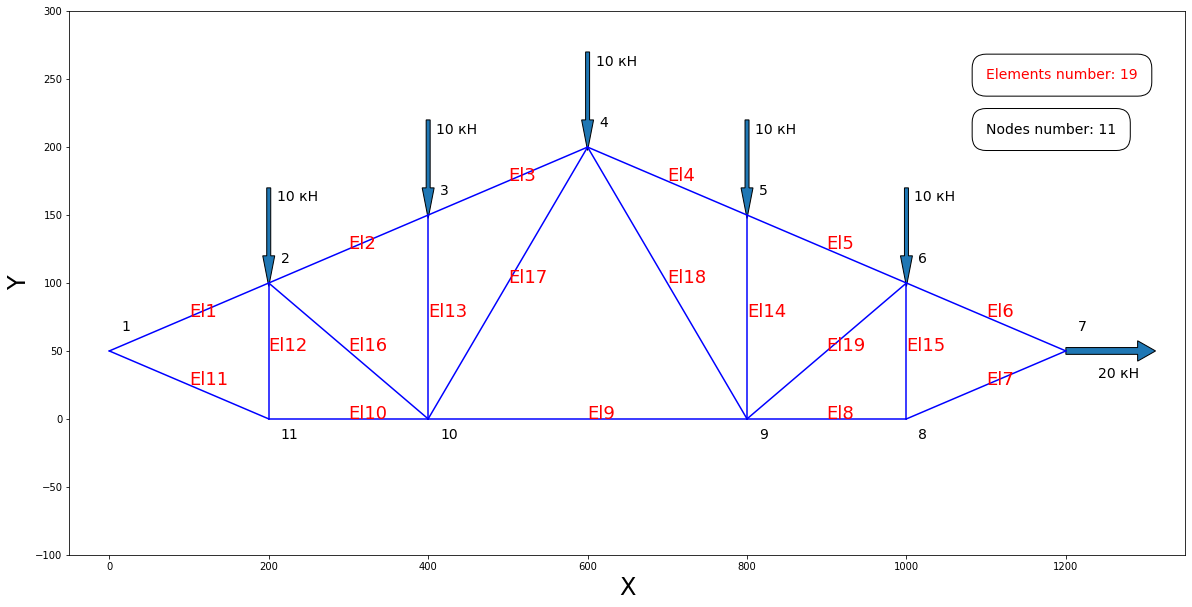

In [253]:
plt.figure(figsize=(20, 10))
for ind, line in enumerate(El.T - 1):  # элементы 
    plt.plot(X[(line)], Y[(line)], color='blue')
    plt.text(x_mid[ind], y_mid[ind], f'El{ind+1}', fontsize=18, color='red')
for ind in range(len(X)):  # узлы
    plt.text(X[ind] + 15, Y[ind] + 15 if ind < 7 else Y[ind] - 15, f'{ind + 1}', fontsize=14)
    if ind in [1, 2, 3, 4, 5]:
        plt.arrow(X[ind], Y[ind]+70, 0, -50, width = 5)
        plt.text(X[ind] + 10, Y[ind] + 60, '10 кН', fontsize=14)
    elif ind == 6:
        plt.arrow(X[ind], Y[ind], 90, 0, width = 5)
        plt.text(X[ind] + 40, Y[ind] - 20, '20 кН', fontsize=14)
        
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xlim(-50, 1350)
plt.ylim(-100, 300)
plt.text(1100, 250, f'Elements number: {len(El[0])}', fontsize=14, color='red', 
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(1100, 210, f'Nodes number: {len(X)}', fontsize=14, color='black',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()

## 2. Задание граничных условий

In [196]:
# Первая строка матрицы это X, вторая - Y
# Если в узле перемещение = 0, то в матрице указываем 1
v = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 1 ,0 ,0 ,0 ,0]])

In [197]:
# Силы действующие на узлы
Fx = 20000
Fy = -10000
F = np.array([[0,  0,  0,  0,  0,  0, Fx, 0, 0, 0, 0],
              [0, Fy, Fy, Fy, Fy, Fy,  0, 0, 0, 0, 0]])

## 3. Длина элемента

In [198]:
dX = X[El[1, :] - 1] - X[El[0, :] - 1]
dY = Y[El[1, :] - 1] - Y[El[0, :] - 1]
L = np.sqrt(dX ** 2 + dY ** 2)

In [199]:
L

array([206.15528128, 206.15528128, 206.15528128, 206.15528128,
       206.15528128, 206.15528128, 206.15528128, 200.        ,
       400.        , 200.        , 206.15528128, 100.        ,
       150.        , 150.        , 100.        , 223.60679775,
       282.84271247, 282.84271247, 223.60679775])

## 4. SIN and COS

In [200]:
SIN = dY / L
COS = dX / L

In [201]:
SIN

array([ 0.24253563,  0.24253563,  0.24253563, -0.24253563, -0.24253563,
       -0.24253563, -0.24253563,  0.        ,  0.        ,  0.        ,
       -0.24253563, -1.        , -1.        , -1.        , -1.        ,
       -0.4472136 , -0.70710678, -0.70710678, -0.4472136 ])

In [202]:
COS

array([ 0.9701425 ,  0.9701425 ,  0.9701425 ,  0.9701425 ,  0.9701425 ,
        0.9701425 , -0.9701425 , -1.        , -1.        , -1.        ,
        0.9701425 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.89442719, -0.70710678,  0.70710678, -0.89442719])

In [203]:
dX

array([ 200,  200,  200,  200,  200,  200, -200, -200, -400, -200,  200,
          0,    0,    0,    0,  200, -200,  200, -200])

In [204]:
dY

array([  50,   50,   50,  -50,  -50,  -50,  -50,    0,    0,    0,  -50,
       -100, -150, -150, -100, -100, -200, -200, -100])

## 5. Сфомировать элементную матрицу жесткости

In [205]:
EAL = Ex * Ars / L

In [206]:
k_el = np.zeros((ne, 4, 4))
for i in range(ne):
    k_el[i,...] = EAL[i] * np.array([[COS[i] ** 2  , COS[i] * SIN[i] , -(COS[i] ** 2) , -COS[i] * SIN[i]],
                                 [COS[i] * SIN[i] , SIN[i] ** 2  , -COS[i] * SIN[i], -(SIN[i] ** 2) ],
                                 [-(COS[i] ** 2) , -COS[i] * SIN[i], COS[i] ** 2  , COS[i] * SIN[i] ],
                                 [-COS[i] * SIN[i], -(SIN[i] ** 2) , COS[i] * SIN[i] , SIN[i] ** 2  ]])
k_el   

array([[[ 7.30460235e+09,  1.82615059e+09, -7.30460235e+09,
         -1.82615059e+09],
        [ 1.82615059e+09,  4.56537647e+08, -1.82615059e+09,
         -4.56537647e+08],
        [-7.30460235e+09, -1.82615059e+09,  7.30460235e+09,
          1.82615059e+09],
        [-1.82615059e+09, -4.56537647e+08,  1.82615059e+09,
          4.56537647e+08]],

       [[ 7.30460235e+09,  1.82615059e+09, -7.30460235e+09,
         -1.82615059e+09],
        [ 1.82615059e+09,  4.56537647e+08, -1.82615059e+09,
         -4.56537647e+08],
        [-7.30460235e+09, -1.82615059e+09,  7.30460235e+09,
          1.82615059e+09],
        [-1.82615059e+09, -4.56537647e+08,  1.82615059e+09,
          4.56537647e+08]],

       [[ 7.30460235e+09,  1.82615059e+09, -7.30460235e+09,
         -1.82615059e+09],
        [ 1.82615059e+09,  4.56537647e+08, -1.82615059e+09,
         -4.56537647e+08],
        [-7.30460235e+09, -1.82615059e+09,  7.30460235e+09,
          1.82615059e+09],
        [-1.82615059e+09, -4.56537647e+

## 6. Расширенная матрица жесткости

In [207]:
k_sys = np.zeros((2*nn, 2*nn))
for e in range(ne):
    i = El[0,e]
    j = El[1,e]
    index = (2*i-1-1, 2*i-1, 2*j-1-1, 2*j-1)  # Вычитаем 1 для питоновской индексации от 0
    k_sys[np.ix_(index, index)] = k_sys[np.ix_(index, index)] + k_el[e,...]


In [208]:
k_sys

array([[ 1.27830541e+10,  4.56537647e+08, -7.30460235e+09,
        -1.82615059e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -5.47845177e+09,
         1.36961294e+09],
       [ 4.56537647e+08,  7.98940882e+08, -1.82615059e+09,
        -4.56537647e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.36961294e+09,
        -3.42403235e+08],
       [-7.30460235e+09, -1.82615059e+09,  1.74713717e+10,
         2.22121767e+09, -7.30460235e+09, -1.82615059e+09,
    

Отображение глобальной матрицы жесткости

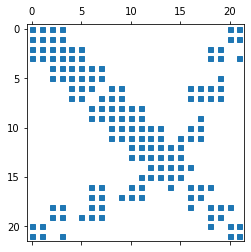

In [209]:
plt.spy(k_sys, markersize=5)
plt.show()

## Переформатирование матриц v и F

In [210]:
Force = F.T.ravel().reshape(-1,1)
disp_s = v.T.ravel().reshape(-1,1)
disp_s

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [211]:
Force

array([[     0],
       [     0],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [ 20000],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0]])

## 7. Редуцирование размерности матрицы

In [225]:
mask = ~disp_s.astype(bool).ravel()  # маска для удаления строк, где перемещения == 0 
mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [226]:
F_red = Force[mask].reshape(-1, 1)
F_red

array([[     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [     0],
       [-10000],
       [ 20000],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0]])

In [228]:
k_red = k_sys[np.ix_(mask, mask)]
k_red

array([[ 1.74713717e+10,  2.22121767e+09, -7.30460235e+09,
        -1.82615059e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.86216701e+09,  1.43108351e+09,  0.00000000e+00,
         0.00000000e+00],
       [ 2.22121767e+09,  9.62861705e+09, -1.82615059e+09,
        -4.56537647e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.43108351e+09, -7.15541753e+08,  0.00000000e+00,
        -8.00000000e+09],
       [-7.30460235e+09, -1.82615059e+09,  1.46092047e+10,
         3.65230118e+09, -7.30460235e+09, -1.82615059e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    

In [229]:
k_red.shape

(19, 19)

## 8. Решение системы линейных алгебраических уравнений

In [230]:
k_inv = np.linalg.inv(k_red) #обратная матрица
disp_red = np.dot(k_inv,F_red)  #перемножение матриц
disp_red  #искомые перемещения

array([[ 1.47361165e-05],
       [-8.08484648e-05],
       [ 1.67445607e-05],
       [-1.14436907e-04],
       [ 1.12086331e-05],
       [-1.17847861e-04],
       [ 5.67270556e-06],
       [-1.14436907e-04],
       [ 7.68114973e-06],
       [-8.08484648e-05],
       [ 2.24172663e-05],
       [ 3.12086331e-05],
       [-7.89734648e-05],
       [ 2.12086331e-05],
       [-1.12561907e-04],
       [ 1.20863313e-06],
       [-1.12561907e-04],
       [-8.79136687e-06],
       [-7.89734648e-05]])

## Переформатирование матрицы перемещений

In [231]:
disp = np.zeros((2*nn, 1))
disp[mask] = disp_red
disp

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.47361165e-05],
       [-8.08484648e-05],
       [ 1.67445607e-05],
       [-1.14436907e-04],
       [ 1.12086331e-05],
       [-1.17847861e-04],
       [ 5.67270556e-06],
       [-1.14436907e-04],
       [ 7.68114973e-06],
       [-8.08484648e-05],
       [ 2.24172663e-05],
       [ 0.00000000e+00],
       [ 3.12086331e-05],
       [-7.89734648e-05],
       [ 2.12086331e-05],
       [-1.12561907e-04],
       [ 1.20863313e-06],
       [-1.12561907e-04],
       [-8.79136687e-06],
       [-7.89734648e-05]])

In [232]:
disp_X = disp[::2].ravel() #Перемещения на нечетных строках(X)
disp_X

array([ 0.00000000e+00,  1.47361165e-05,  1.67445607e-05,  1.12086331e-05,
        5.67270556e-06,  7.68114973e-06,  2.24172663e-05,  3.12086331e-05,
        2.12086331e-05,  1.20863313e-06, -8.79136687e-06])

In [233]:
disp_Y = disp[1::2].ravel() #Перемещения на четных строках(Y)
disp_Y

array([ 0.00000000e+00, -8.08484648e-05, -1.14436907e-04, -1.17847861e-04,
       -1.14436907e-04, -8.08484648e-05,  0.00000000e+00, -7.89734648e-05,
       -1.12561907e-04, -1.12561907e-04, -7.89734648e-05])

## 9. Визуализация результатов

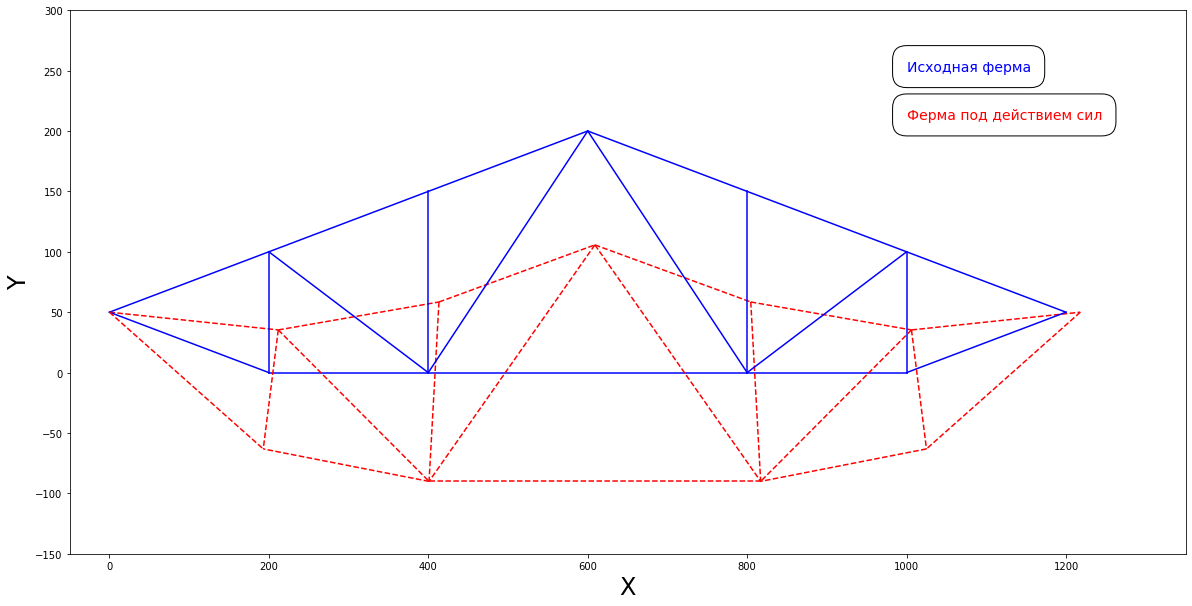

In [256]:
SCALE = 800000 #Масштаб для улучшения видимости перемещений
plt.figure(figsize=(20, 10))
for ind, line in enumerate(El.T - 1):  # элементы 
    plt.plot(X[(line)], Y[(line)], color='blue')
    plt.plot((X + SCALE*disp_X)[(line)], (Y + SCALE*disp_Y)[(line)], color='red', ls='--')
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xlim(-50, 1350)
plt.ylim(-150, 300)
plt.text(1000, 250, 'Исходная ферма', fontsize=14, color='blue', 
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(1000, 210, 'Ферма под действием сил', fontsize=14, color='red',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.show()